In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import random



In [82]:
df = pd.read_csv('mnist-1.csv')
df = df.iloc[:, 1:] #remove label



# Q1
### PCA

Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data. Please also copy your code snippet here.


In [58]:
class pca:
    def __init__(self, x, n_components = None):
        self.x = x
        self.n_components = n_components
        self.num_features = x.shape[0]
        self.ori_feat = x.shape[1]
        self.cov_mat = None
        self.P = None
        self.y = None

    def cov(self):
        self.cov_mat = np.cov(self.x.T)
        return self.cov_mat
    def standardization(self):
        return self.x - np.mean(self.x, axis=0)
    def reduce_feature(self):
        x_meaned = self.standardization()
        x_cov = self.cov()
        eigen_val, eigen_vec = np.linalg.eig(x_cov)
        sort_index = np.argsort(eigen_val[::-1]) #Use np.argsort()

        sorted_eigenval = eigen_val[sort_index]
        sorted_eigenvector = eigen_vec[:,sort_index]

        self.P = sorted_eigenvector[:,:self.n_components]
        self.y = np.dot(self.P.T, x_meaned.T).T
        return self.y

pca_1 = pca(df, 10)
new_df = pca_1.reduce_feature()
print(f'The input x has shape {df.shape}, and the transformed x has shape {new_df.shape}')
print(f'The sum of the input covariance matrix is {round(np.sum(pca_1.cov_mat), 5)}.')
print(f'The sum of the transformed covariance matrix is {round(np.sum(np.cov(new_df.T)).real, 5)}.')

The input x has shape (5999, 784), and the transformed x has shape (5999, 10)
The sum of the input covariance matrix is 1128.08743.
The sum of the transformed covariance matrix is 5.84584.


# Q2
### K-Means

Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups. Please copy your code snippet here.

In [132]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum(np.linalg.norm(x[clusters[i]] - cluster_center[i], axis=1) ** 2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history


clusters, cluster_center, loss = k_means(df, 10)
for i, c in enumerate(cluster_center):
    print(f'centroid {i}: {np.sum(c)}')






centroid 0: 118.63318207282931
centroid 1: 69.72717806608733
centroid 2: 140.1534791533942
centroid 3: 97.0409806122226
centroid 4: 112.71649023245675
centroid 5: 143.7366610997712
centroid 6: 66.66850490196087
centroid 7: 118.41863075196426
centroid 8: 127.30996808025546
centroid 9: 97.19438261791223


# Q3
### visualization

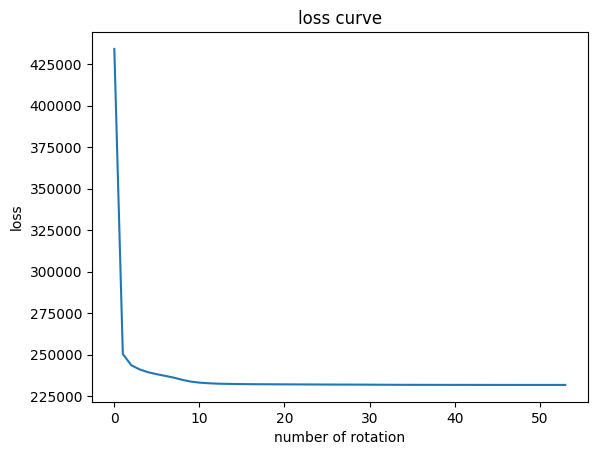

In [135]:
#visualize
plt.xlabel('number of rotation')
plt.ylabel('loss')
plt.title('loss curve')
plt.plot(loss)

# Q4
### find optimal k

In [136]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []
    
    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):

            return clusters, new_clusters_center

        # d. update the centroid

        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center

def find_best_k (training_set, validation_set):
    result_lose_arr = []
    result = 9999999999999999
    result_index = 0

    for k in range(2, 50):
        clusters, cluster_center = k_means(training_set, k)#use training set to train
        
        validation_cluster = []#build validation cluster
        for i in range(k):
            validation_cluster.append([])
        # =====use validation set to test========
        for i in range(validation_set.shape[0]):
            xi = validation_set[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            validation_cluster[c].append(i) # Append this datapoint to this cluster

    # =======================================
    #build the loss array
        validation_loss = 0
        for i in range(k):
            if len(validation_cluster[i]) > 0:
                validation_loss += np.sum(np.linalg.norm(validation_set[validation_cluster[i]] - cluster_center[i], axis=1) ** 2)
        result_lose_arr.append(validation_loss)

    for i in range(len(result_lose_arr)):
        if result_lose_arr[i] < result:
            result = result_lose_arr[i]
            result_index = i


    return result_lose_arr, result, result_index

#split the dataset
train = df.iloc[:4000].values
val = df.iloc[4000:].values
result_lose_arr, result, result_index = find_best_k (train, val)



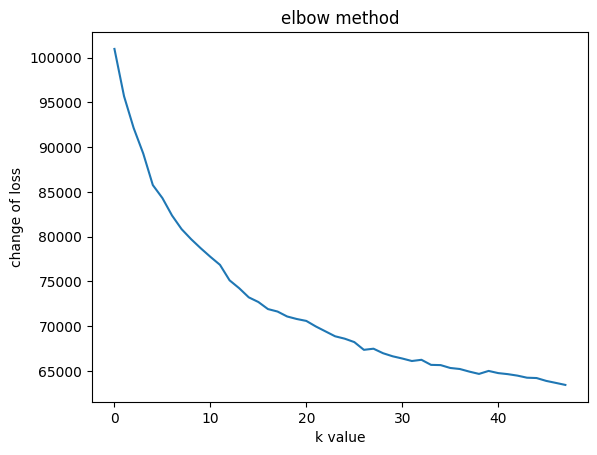

In [138]:
#visualize
plt.xlabel('k value')
plt.ylabel('change of loss')
plt.title('elbow method')
plt.plot(result_lose_arr)

#### Use the Elbow method we can see an apperant elbow plot is at k = 25.

#### Therefore, we can claim that the optimal k is k = 25.

# Q5
### kernel k-means algorithm with RBF-kernel

Please only use the first 500 samples and cluster the them into 5 groups. This is for reducing the running time of your code. 

Please copy your code snippet here.

TIPS: If you can use matrix operations to replace summations, your code will be more efficient. However, this is just optional.

In [69]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history


def cal_RBF(x):
    ## implement RBF method
    n = x.shape[0]
    # ==============================================================
    # "You need to initialize k"
    kernel_x = np.zeros((n,n))

    # ==============================================================
    sigma = 0

    for i in range(n):
        for j in range(n):
            # ==============================================================
            # "You need to implement sigma here"
            sigma += np.linalg.norm(x[i] - x[j]) ** 2

            # ==============================================================
    sigma = 2 * sigma/(n**2)
    # gamma = 1/(2*sigma)

    for i in range(n):
        for j in range(n):
            # ==============================================================
            # "You need to implement kernel x here"
            kernel_x[i, j] = np.exp(-(np.linalg.norm(x[i]-x[j]))**2/sigma)
            #kernel_x[i, j] = np.exp(-gamma * np.linalg.norm(x[i]-x[j]))**2)

            # ==============================================================
    #kernel_x = k
    return kernel_x

kernel_x = cal_RBF(df[:500].values)
clusters, cluster_center, loss = k_means(kernel_x, 5)

for i, c in enumerate(cluster_center):
    print(f'centroid {i}: {np.sum(c)}')


centroid 0: 285.9141928207985
centroid 1: 321.935780798391
centroid 2: 326.1115875087804
centroid 3: 254.26134691094742
centroid 4: 308.3488201843429
